In [84]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import date

In [85]:
df = yf.download('NVDA', '2018-01-01','2023-01-18')

def rsi(df, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df['Close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

[*********************100%***********************]  1 of 1 completed


In [86]:
rsi(df)

Date
2018-01-02          NaN
2018-01-03          NaN
2018-01-04          NaN
2018-01-05          NaN
2018-01-08          NaN
                ...    
2023-01-10    54.002433
2023-01-11    54.698730
2023-01-12    58.453333
2023-01-13    61.095156
2023-01-17    65.924397
Name: Close, Length: 1269, dtype: float64

In [87]:
data = yf.Ticker('VOO').history(period='1y')[['Close', 'Open', 'High', 'Volume']]

startdate = date(2022,1,18)
end_date = date.today()

# View our data
print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-02   48.945000   49.875000   48.625000   49.837502   49.334675   
2018-01-03   51.025002   53.424999   50.937500   53.117500   52.581585   
2018-01-04   53.939999   54.512501   53.172501   53.397499   52.858753   
2018-01-05   53.547501   54.227501   52.770000   53.849998   53.306679   
2018-01-08   55.099998   56.250000   54.645000   55.500000   54.940041   
...                ...         ...         ...         ...         ...   
2023-01-10  155.070007  159.619995  154.720001  159.089996  159.089996   
2023-01-11  158.399994  160.279999  155.630005  160.009995  160.009995   
2023-01-12  161.000000  166.369995  154.919998  165.110001  165.110001   
2023-01-13  162.779999  169.220001  161.649994  168.990005  168.990005   
2023-01-17  168.990005  177.279999  168.990005  177.020004  177.020004   

              Volume  
Date          

In [88]:
data['SMA 30'] = ta.sma(data['Close'],30)
data['SMA 100'] = ta.sma(data['Close'],100)
#SMA BUY SELL
#Function for buy and sell signal
def buy_sell(data):
    signalBuy = []
    signalSell = []
    position = False 

    for i in range(len(data)):
        if data['SMA 30'][i] > data['SMA 100'][i]:
            if position == False :
                signalBuy.append(data['Close'][i])
                signalSell.append(np.nan)
                position = True
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        elif data['SMA 30'][i] < data['SMA 100'][i]:
            if position == True:
                signalBuy.append(np.nan)
                signalSell.append(data['Close'][i])
                position = False
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan)
    return pd.Series([signalBuy, signalSell])

In [89]:
data['Buy_Signal_price'], data['Sell_Signal_price'] = buy_sell(data)
data

,Close,Open,High,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price
Date,,,,,,,,
2022-01-19 00:00:00-05:00,408.484772,414.228547,415.575963,8184100,NaN,NaN,NaN,NaN
2022-01-20 00:00:00-05:00,403.990112,410.294470,414.798972,8907600,NaN,NaN,NaN,NaN
2022-01-21 00:00:00-05:00,396.053101,402.957390,405.140803,16225900,NaN,NaN,NaN,NaN
2022-01-24 00:00:00-05:00,397.705383,390.712581,398.206987,22970700,NaN,NaN,NaN,NaN
2022-01-25 00:00:00-05:00,392.876312,391.607595,397.597219,16836300,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-01-11 00:00:00-05:00,363.450012,360.410004,363.510010,5710500,357.858174,353.684690,NaN,NaN
2023-01-12 00:00:00-05:00,364.809998,364.480011,366.149994,4743500,357.965893,353.487007,NaN,NaN
2023-01-13 00:00:00-05:00,366.230011,361.679993,366.730011,3012300,357.750055,353.384577,NaN,NaN


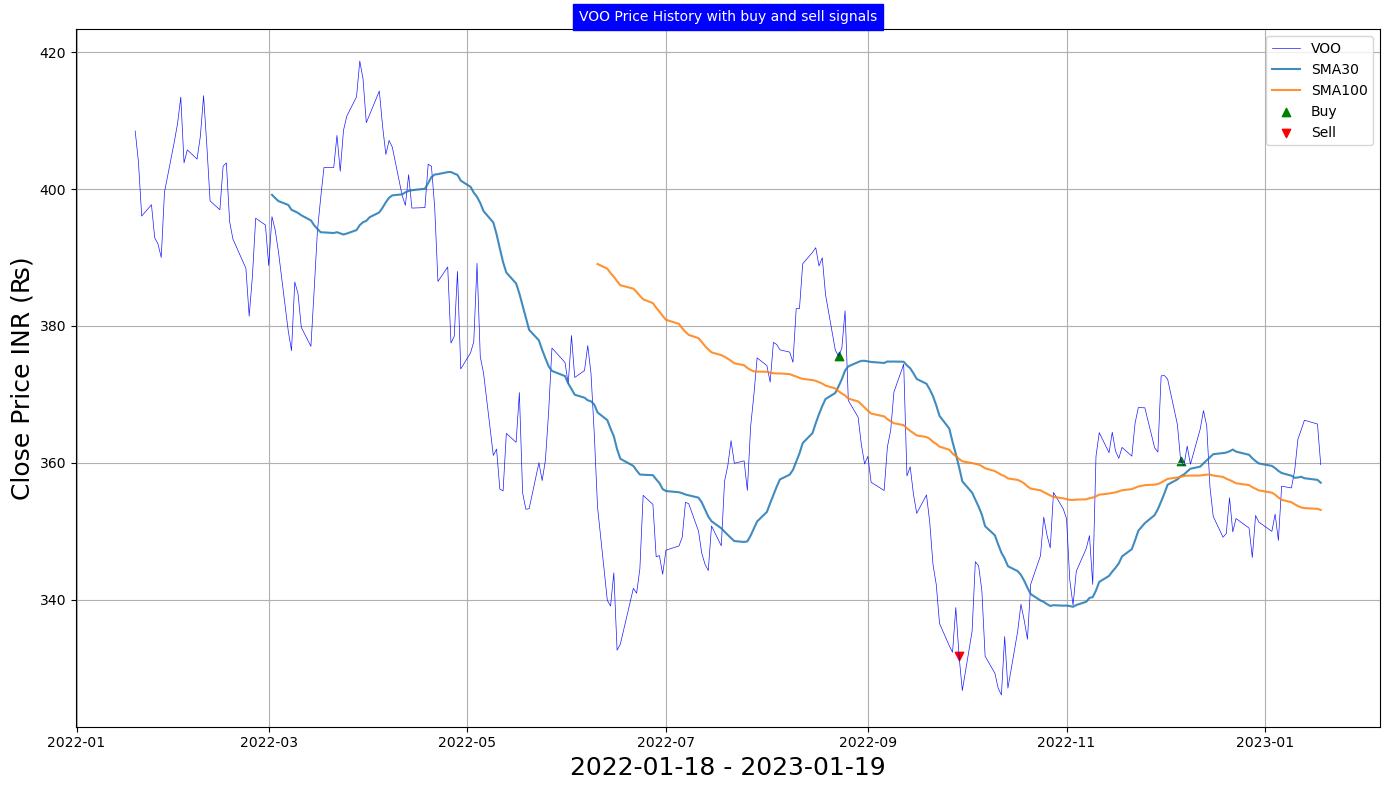

In [90]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(data['Close'] , label = "VOO",linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(data['SMA 30'], label = 'SMA30', alpha = 0.85)
ax.plot(data['SMA 100'], label = 'SMA100' , alpha = 0.85)
ax.scatter(data.index , data['Buy_Signal_price'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(data.index , data['Sell_Signal_price'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title("VOO" + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [91]:
macd = ta.macd(data['Close'])
macd

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
2022-01-19 00:00:00-05:00,NaN,NaN,NaN
2022-01-20 00:00:00-05:00,NaN,NaN,NaN
2022-01-21 00:00:00-05:00,NaN,NaN,NaN
2022-01-24 00:00:00-05:00,NaN,NaN,NaN
2022-01-25 00:00:00-05:00,NaN,NaN,NaN
...,...,...,...
2023-01-11 00:00:00-05:00,-0.149703,1.230691,-1.380394
2023-01-12 00:00:00-05:00,0.600790,1.584947,-0.984157
2023-01-13 00:00:00-05:00,1.295214,1.823497,-0.528283


In [92]:
data = pd.concat([data, macd], axis=1).reindex(data.index)
data

,Close,Open,High,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,,,,,,,,,
2022-01-19 00:00:00-05:00,408.484772,414.228547,415.575963,8184100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-20 00:00:00-05:00,403.990112,410.294470,414.798972,8907600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-21 00:00:00-05:00,396.053101,402.957390,405.140803,16225900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-24 00:00:00-05:00,397.705383,390.712581,398.206987,22970700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-25 00:00:00-05:00,392.876312,391.607595,397.597219,16836300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-11 00:00:00-05:00,363.450012,360.410004,363.510010,5710500,357.858174,353.684690,NaN,NaN,-0.149703,1.230691,-1.380394
2023-01-12 00:00:00-05:00,364.809998,364.480011,366.149994,4743500,357.965893,353.487007,NaN,NaN,0.600790,1.584947,-0.984157
2023-01-13 00:00:00-05:00,366.230011,361.679993,366.730011,3012300,357.750055,353.384577,NaN,NaN,1.295214,1.823497,-0.528283


In [93]:
def MACD_Strategy(df, risk):
    MACD_Buy=[]
    MACD_Sell=[]
    position=False

    for i in range(0, len(df)):
        if df['MACD_12_26_9'][i] > df['MACDs_12_26_9'][i] :
            MACD_Sell.append(np.nan)
            if position ==False:
                MACD_Buy.append(df['Close'][i])
                position=True
            else:
                MACD_Buy.append(np.nan)
        elif df['MACD_12_26_9'][i] < df['MACDs_12_26_9'][i] :
            MACD_Buy.append(np.nan)
            if position == True:
                MACD_Sell.append(df['Close'][i])
                position=False
            else:
                MACD_Sell.append(np.nan)
        elif position == True and df['Close'][i] < MACD_Buy[-1] * (1 - risk):
            MACD_Sell.append(df["Close"][i])
            MACD_Buy.append(np.nan)
            position = False
        elif position == True and df['Close'][i] < df['Close'][i - 1] * (1 - risk):
            MACD_Sell.append(df["Close"][i])
            MACD_Buy.append(np.nan)
            position = False
        else:
            MACD_Buy.append(np.nan)
            MACD_Sell.append(np.nan)

    data['MACD_Buy_Signal_price'] = MACD_Buy
    data['MACD_Sell_Signal_price'] = MACD_Sell

In [94]:
MACD_strategy = MACD_Strategy(data, 0.025)
data

,Close,Open,High,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD_Buy_Signal_price,MACD_Sell_Signal_price
Date,,,,,,,,,,,,,
2022-01-19 00:00:00-05:00,408.484772,414.228547,415.575963,8184100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-20 00:00:00-05:00,403.990112,410.294470,414.798972,8907600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-21 00:00:00-05:00,396.053101,402.957390,405.140803,16225900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-24 00:00:00-05:00,397.705383,390.712581,398.206987,22970700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-25 00:00:00-05:00,392.876312,391.607595,397.597219,16836300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-11 00:00:00-05:00,363.450012,360.410004,363.510010,5710500,357.858174,353.684690,NaN,NaN,-0.149703,1.230691,-1.380394,NaN,NaN
2023-01-12 00:00:00-05:00,364.809998,364.480011,366.149994,4743500,357.965893,353.487007,NaN,NaN,0.600790,1.584947,-0.984157,NaN,NaN
2023-01-13 00:00:00-05:00,366.230011,361.679993,366.730011,3012300,357.750055,353.384577,NaN,NaN,1.295214,1.823497,-0.528283,NaN,NaN


In [95]:
def MACD_color(data):
    MACD_color = []
    for i in range(0, len(data)):
        if data['MACDh_12_26_9'][i] > data['MACDh_12_26_9'][i - 1]:
            MACD_color.append(True)
        else:
            MACD_color.append(False)
    return MACD_color

data['positive'] = MACD_color(data)
data

,Close,Open,High,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD_Buy_Signal_price,MACD_Sell_Signal_price,positive
Date,,,,,,,,,,,,,,
2022-01-19 00:00:00-05:00,408.484772,414.228547,415.575963,8184100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2022-01-20 00:00:00-05:00,403.990112,410.294470,414.798972,8907600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2022-01-21 00:00:00-05:00,396.053101,402.957390,405.140803,16225900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2022-01-24 00:00:00-05:00,397.705383,390.712581,398.206987,22970700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2022-01-25 00:00:00-05:00,392.876312,391.607595,397.597219,16836300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-11 00:00:00-05:00,363.450012,360.410004,363.510010,5710500,357.858174,353.684690,NaN,NaN,-0.149703,1.230691,-1.380394,NaN,NaN,True
2023-01-12 00:00:00-05:00,364.809998,364.480011,366.149994,4743500,357.965893,353.487007,NaN,NaN,0.600790,1.584947,-0.984157,NaN,NaN,True
2023-01-13 00:00:00-05:00,366.230011,361.679993,366.730011,3012300,357.750055,353.384577,NaN,NaN,1.295214,1.823497,-0.528283,NaN,NaN,True


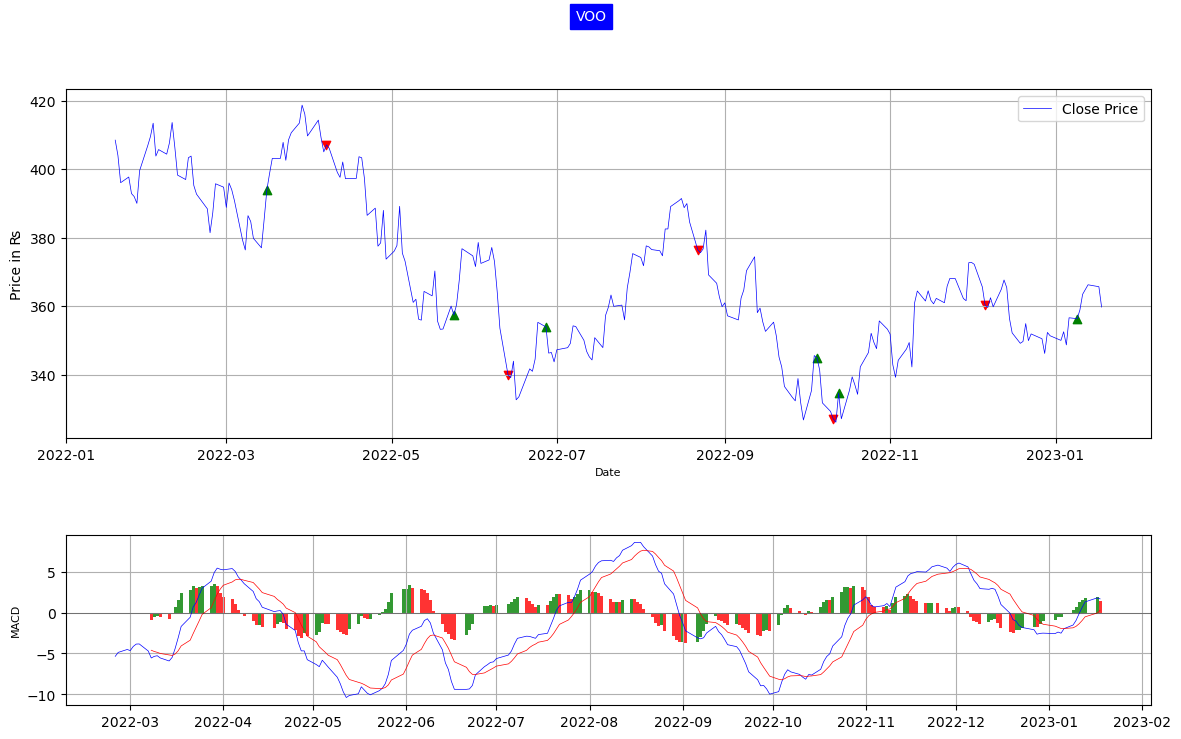

In [96]:
plt.rcParams.update({'font.size': 10})
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle("VOO", fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot('Close',data=data, label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['MACD_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['MACD_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.set_ylabel('MACD', fontsize=8)
ax2.plot('MACD_12_26_9', data=data, label='MACD', linewidth=0.5, color='blue')
ax2.plot('MACDs_12_26_9', data=data, label='signal', linewidth=0.5, color='red')
ax2.bar(data.index,'MACDh_12_26_9', data=data, label='Volume', color=data.positive.map({True: 'g', False: 'r'}),width=1,alpha=0.8)
ax2.axhline(0, color='black', linewidth=0.5, alpha=0.5)
ax2.grid()
plt.show()

In [97]:
def bb_strategy(data):
    bbBuy = []
    bbSell = []
    position = False
    bb = ta.bbands(data['Close'], length=20,std=2)
    data = pd.concat([data, bb], axis=1).reindex(data.index)

    for i in range(len(data)):
        if data['Close'][i] < data['BBL_20_2.0'][i]:
            if position == False :
                bbBuy.append(data['Close'][i])
                bbSell.append(np.nan)
                position = True
            else:
                bbBuy.append(np.nan)
                bbSell.append(np.nan)
        elif data['Close'][i] > data['BBU_20_2.0'][i]:
            if position == True:
                bbBuy.append(np.nan)
                bbSell.append(data['Close'][i])
                position = False #To indicate that I actually went there
            else:
                bbBuy.append(np.nan)
                bbSell.append(np.nan)
        else :
            bbBuy.append(np.nan)
            bbSell.append(np.nan)

    data['bb_Buy_Signal_price'] = bbBuy
    data['bb_Sell_Signal_price'] = bbSell

    return data

In [98]:
#storing the function
data = bb_strategy(data)
data

,Close,Open,High,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD_Buy_Signal_price,MACD_Sell_Signal_price,positive,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,bb_Buy_Signal_price,bb_Sell_Signal_price
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-19 00:00:00-05:00,408.484772,414.228547,415.575963,8184100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-20 00:00:00-05:00,403.990112,410.294470,414.798972,8907600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-21 00:00:00-05:00,396.053101,402.957390,405.140803,16225900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-24 00:00:00-05:00,397.705383,390.712581,398.206987,22970700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-25 00:00:00-05:00,392.876312,391.607595,397.597219,16836300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-11 00:00:00-05:00,363.450012,360.410004,363.510010,5710500,357.858174,353.684690,NaN,NaN,-0.149703,1.230691,-1.380394,NaN,NaN,True,342.836689,354.190706,365.544722,6.411245,0.907755,NaN,NaN
2023-01-12 00:00:00-05:00,364.809998,364.480011,366.149994,4743500,357.965893,353.487007,NaN,NaN,0.600790,1.584947,-0.984157,NaN,NaN,True,343.313436,354.049733,364.786030,6.064852,1.001116,NaN,364.809998
2023-01-13 00:00:00-05:00,366.230011,361.679993,366.730011,3012300,357.750055,353.384577,NaN,NaN,1.295214,1.823497,-0.528283,NaN,NaN,True,343.176439,354.090730,365.005022,6.164686,1.056119,NaN,NaN


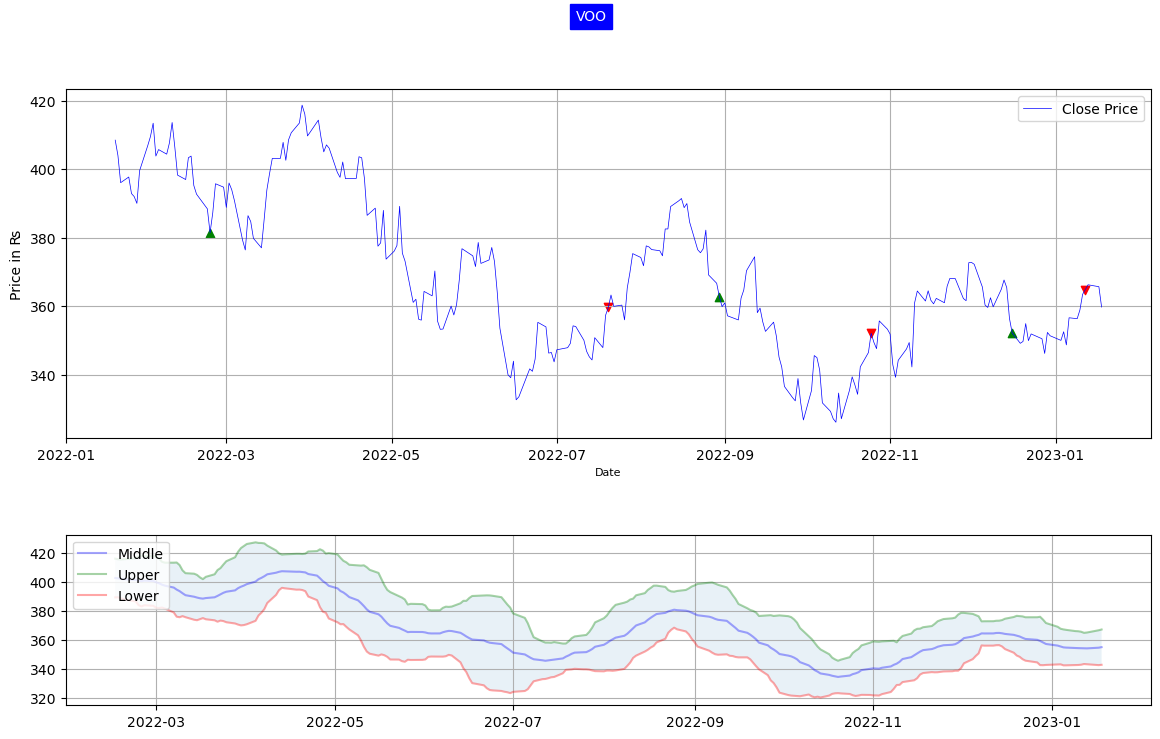

In [99]:
#plot
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle("VOO", fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot(data['Close'],label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['bb_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['bb_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.plot(data['BBM_20_2.0'], label='Middle', color='blue', alpha=0.35) #middle band
ax2.plot(data['BBU_20_2.0'], label='Upper', color='green', alpha=0.35) #Upper band
ax2.plot(data['BBL_20_2.0'], label='Lower', color='red', alpha=0.35) #lower band
ax2.fill_between(data.index, data['BBL_20_2.0'], data['BBU_20_2.0'], alpha=0.1)
ax2.legend(loc='upper left')
ax2.grid()
plt.show()